# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 2381 Соколов Сергей Александрович и Тищенко Артем Михайлович. Вариант №2.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения


Полиномиальное сглаживание является одним из видов дискретного нерекурсивного фильтра. В общем виде для входного сигнала $x_n$ фильтр выглядит следующим образом:

$y_n = \sum_{k=0}^Nc_kx_{n-k}$

В полиномиальном сглаживании предполагается, что фильтр является многочленом, т.е. для входного сигнала $s(t)$ фильтр будет иметь вид

$y(t) = a_0 + a_1t + a_2t^2 … + a_mt^m$

При сглаживании полиномом степени $m$, необходимо уменьшить квадратичное отклонение имеющихся данных с полиномом.

Запишем решение задачи в матричной форме, получим
$ N =
\begin{pmatrix}
1 &  0 & 0 & \cdots & 0\\
1 &  1 & 1 & \cdots & 1\\
1 & -1 & 1 & \cdots & (-1)^m\\
1 &  2 & 4 & \dots & 2^m\\
\dots & \dots & \cdots & \cdots\\
1 &  n & n^2 & \cdots & n^m\\
\end{pmatrix},
S =
\begin{pmatrix}
s_0 \\
s_{1} \\
s_{-1} \\
s_{2} \\
\dots\\
s_{n}
\end{pmatrix},
a =
\begin{pmatrix}
a_0 \\
a_{1} \\
a_{2} \\
\dots\\
a_{m}
\end{pmatrix},
\varepsilon =
\begin{pmatrix}
\varepsilon_0 \\
\varepsilon_{1} \\
\varepsilon_{-1} \\
\dots\\
\varepsilon_{n}
\end{pmatrix}
$

Тогда в матричной форме $Y=Na + \varepsilon$

Для получения коэффициентов $a_0, a_1$ необходимо
$\min ||\varepsilon||_2^2 = \min ||S - Na||_2^2 = \min (S-Na)^T\cdot(S-Na)$.

Дифференцируя, получим: $2(S-Na)=0$ или $Na=S$. Поскольку матрица вырождена, используем псевдообратную матрицу, в итоге для вектора коэффициентов полинома:
$a=(N^T N)^{-1} N^T S$

Дискретный фильтр можно представить в виде

$y_n = H(ω)x_n$, где $H(ω) = \frac{y_n}{x_n}$ $-$ передаточная функция.

Связь передаточных функций круговой и циклической частот:

$H(\omega) = H(2\pi f) = \tilde{H}(f)$


## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики
$\tilde H(f)$
. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.



## Выполнение работы

In [43]:
import numpy as np
import matplotlib.pyplot as plt

### Задание 1

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Если полином первой степени, то

$N =
\begin{pmatrix}
1 &  0 \\
1 &  1 \\
1 & -1\\
1 &  2\\
\dots & \dots \\
1 &  n \\
\end{pmatrix}$, а матрица $N^T N =
\begin{pmatrix}
2n + 1 &  0 \\
0 &  2 \sum\limits_{k=1}^{n} k^2
\end{pmatrix}
$, также имеем $N^T S =
\begin{pmatrix}
\sum\limits_{k=-n}^{n} s_k \\
\sum\limits_{k=-n}^{n} k \cdot s_k \\
\end{pmatrix}
$

Случай $2n+1=3$

$(N^T N)^{-1} =
\begin{pmatrix}
3 &  0 \\
0 &  2
\end{pmatrix}^{-1} =
\begin{pmatrix}
1/3 &  0 \\
0 &  1/2
\end{pmatrix}.$

$a=(N^{T}N)^{-1}N^TS =
\begin{pmatrix}
\frac{1}{3} \sum\limits_{k=-1}^{1} s_k  \\
\frac{1}{2} \sum\limits_{k=-1}^{1} k \cdot s_k
\end{pmatrix}
⇒$
&nbsp;&nbsp;&nbsp;
$y_0 = a_0 = \frac{1}{3} \sum\limits_{k=-1}^{1} s_k $, &nbsp;&nbsp;
тогда в общем случае получается $y_t = \frac{1}{3} \sum\limits_{k=t-1}^{t+1} s_k$

Если s - гармонический синал, то $y_t = \frac{1}{3} \sum\limits_{k=t-1}^{t+1} e^{i𝛚k}=e^{i𝛚t} \cdot \frac{1}{3} \sum\limits_{k=-1}^{1} e^{i𝛚(k-t)}$

Передаточная функция $H(𝛚)=\frac{1}{3}(e^0+e^{-i\omega}+e^{i\omega})=\frac{1}{3}(1+2 \cos(𝛚))$

Аналогично, когда $2n+1=5$

$H(\omega) = \frac{1}{5} (1 + 2 \cos(\omega) + 2 \cos(2\omega))$

При $2n+1=7$

$H(\omega) = \frac{1}{7} (1 + 2 \cos(\omega) + 2 \cos(2\omega)) + 2 \cos(3\omega))$

При $2n+1=9$

$H(\omega) = \frac{1}{9} (1 + 2 \cos(\omega) + 2 \cos(2\omega)) + 2 \cos(3\omega))+ 2 \cos(4\omega))$

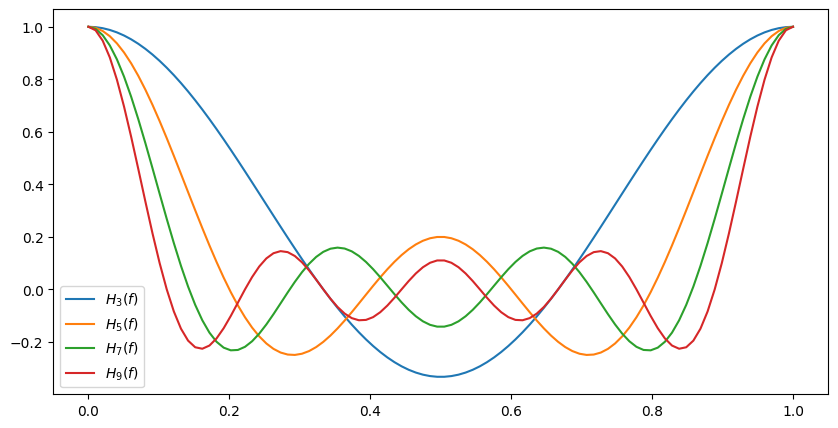

In [44]:
from math import pi
from numpy import cos

t = np.linspace(0, 1, 100)
f = 2 * pi * np.linspace(0, 1, 100)

H_3 = (1 + 2 * (cos(f))) / 3
H_5 = (1 + 2 * (cos(f) + cos(2 * f) )) / 5
H_7 = (1 + 2 * (cos(f) + cos(2 * f) + cos(3 * f) )) / 7
H_9 = (1 + 2 * (cos(f) + cos(2 * f) + cos(3 * f) + cos(4 * f))) / 9

plt.figure(figsize=(10, 5))

plt.plot(t, H_3, label = "$H_3(f)$")
plt.plot(t, H_5, label = "$H_5(f)$")
plt.plot(t, H_7, label = "$H_7(f)$")
plt.plot(t, H_9, label = "$H_9(f)$")
plt.legend()
plt.show()

## Задание 2

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики
$\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Если полином второй степени, то

$ N =
\begin{pmatrix}
1 &  0 & 0 \\
1 &  1 & 1 \\
1 & -1 & 1 \\
1 &  2 & 4 \\
\dots & \dots\\
1 &  n & n^2 \\
\end{pmatrix}$, а матрица $N^T N =
\begin{pmatrix}
2n + 1 &  0 & 2 \sum\limits_{k=1}^{n} k^2\\
0 &  2 \sum\limits_{k=1}^{n} k^2 & 0 \\
2 \sum\limits_{k=1}^{n} k^2 & 0 & 2 \sum\limits_{k=1}^{n} k^4
\end{pmatrix}
$, также имеем $N^T S =
\begin{pmatrix}
\sum\limits_{k=-n}^{n} s_k \\
\sum\limits_{k=-n}^{n} k \cdot s_k \\
\sum\limits_{k=-n}^{n} k^2 \cdot s_k \\
\end{pmatrix}
$

Случай, когда $2n+1=7$

$(N^T N)^{-1} =
\begin{pmatrix}
7 &  0 & 28 \\
0 &  28 & 0 \\
28 & 0 & 196
\end{pmatrix}^{-1} =
\frac{1}{84}
\begin{pmatrix}
28 &  0 & -4\\
0 &  3 & 0\\
-4 &  0 & 1\\
\end{pmatrix}.$


Заметим, что необходимо рассматривал только первый элемент вектора $a$

$y_0=a_0 = \frac{28}{84} \sum\limits_{k=-n}^{n} s_k - \frac{4}{84} \sum\limits_{k=-n}^{n} k^2 s_k = \frac{1}{21}\sum\limits_{k=-n}^{n} (7-k^2) s_k$

$y_t = \frac{1}{21} \sum\limits_{k=t-3}^{t+3} (7-k^2) ⋅ e^{i𝛚k}=e^{i𝛚t} \cdot \frac{1}{21} \sum\limits_{k=-3}^{3} (7-k^2)\cdot e^{i𝛚(k-t)}$

Передаточная функция $H(𝛚)=\frac{1}{21}(7e^0 + 6e^{i\omega} + 6e^{-i\omega} +3e^{2i\omega} + 3e^{-2i\omega}-2e^{3i\omega} 2 e^{-3i\omega})=\frac{1}{21}(7+12\cos(𝛚) +6\cos(2𝛚) - 4\cos(3𝛚))$

Аналогично, когда $2n+1=9$

$H(\omega) = \frac{1}{231} (59 + 108 \cos(\omega) + 78 \cos(2\omega) + 28 \cos(3\omega) - 42 \cos(4\omega))$

При $2n+1=11$

$H(\omega) = \frac{1}{429} (89+168 \cos(ω)+138\cos(2ω)+88\cos(3ω)+18\cos(4ω)- 72 \cos(5ω))
$

При $2n+1=13$

$
H(\omega) = \frac{1}{143} (25 + 48 \cos(ω)+ 42 \cos(2ω)+32 \cos(3ω)+18 \cos(4ω)-22 \cos(6ω))
$

In [45]:
n = 6   # plus points
k2 = sum([k**2 for k in range((n+1))]) # sum of squares
k4 = sum([k**4 for k in range((n+1))]) # sum of 4th power
NN = np.array([ # matrix (N^T @ N)
    [ 2*n + 1, 0,   2 * k2],
    [0,   2*k2, 0],
    [2*k2, 0, 2 * k4],
])
NN_inv = np.linalg.inv(NN)

row = (NN_inv[0]) * 143 # a0
print('cos coefs of H: ', round(row[0]), end=', ')
for k in range(1, n + 1): print(2 * round(row[0] + k**2 * row[2]), end=', ')

cos coefs of H:  25, 48, 42, 32, 18, 0, -22, 

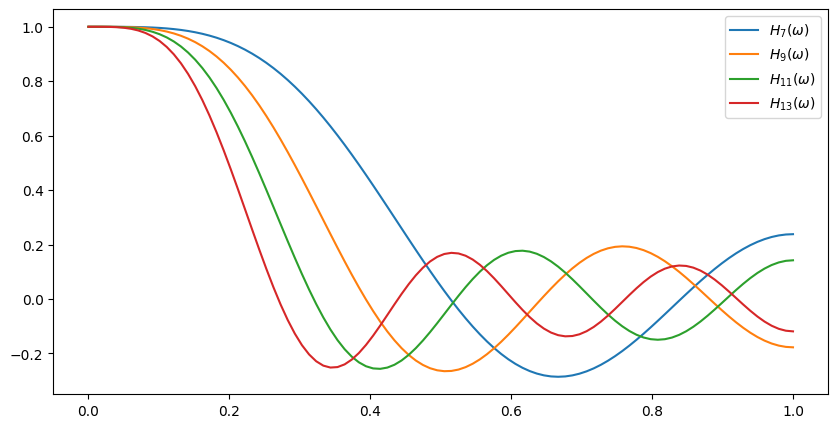

In [46]:
from math import pi
from numpy import cos

t = np.linspace(0, 1, 100)
f = pi * np.linspace(0, 1, 100)

H_7 = (7 + 12 * cos(f) + 6 * cos(2 * f) - 4 * cos(3 * f)) / 21
H_9 = (59 + 108 * cos(f) + 78 * cos(2 * f) + 28 * cos(3 * f) - 42 * cos(4 * f)) / 231
H_11 = (89 + 168 * cos(f) + 138 * cos(2 * f) + 88 * cos(3 * f) + 18 * cos(4 * f) - 72 * cos(5 * f)) / 429
H_13 = (25 + 48 * cos(f) + 42 * cos(2 * f) + 32 * cos(3 * f) + 18 * cos(4 * f) - 22 * cos(6 * f)) / 143

plt.figure(figsize=(10, 5))

plt.plot(t, H_7, label = "$H_7(ω)$")
plt.plot(t, H_9, label = "$H_9(ω)$")
plt.plot(t, H_11, label = "$H_{11}(ω)$")
plt.plot(t, H_13, label = "$H_{13}(ω)$")
plt.legend()
plt.show()

## Задание 3

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики
$\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Если полином четвертой степени, то

$ N =
\begin{pmatrix}
1 &  0 & 0 & 0 & 0\\
1 &  1 & 1 & 1 & 1\\
1 & -1 & 1 & -1 & 1 \\
1 &  2 & 4 & 6 & 8\\
\dots & \dots & \dots & \dots & \dots \\
1 &  n & n^2 & n^3 & n^4 \\
\end{pmatrix}$, а матрица $N^T N =
\begin{pmatrix}
2n + 1 &  0 & 2 \sum\limits_{k=1}^{n} k^2 & 0 & 2\sum\limits_{k=1}^{n} k^4 \\
0 &  2 \sum\limits_{k=1}^{n} k^2 & 0  & 2\sum\limits_{k=1}^{n} k^4 & 0\\
2 \sum\limits_{k=1}^{n} k^2 & 0 & 2 \sum\limits_{k=1}^{n} k^4  & 0 & 2\sum\limits_{k=1}^{n} k^6\\
0 & 2\sum\limits_{k=1}^{n} k^4 & 0 & 2\sum\limits_{k=1}^{n} k^6 & 0\\
2\sum\limits_{k=1}^{n} k^4 & 0 & 2\sum\limits_{k=1}^{n} k^6 & 0 & 2 \sum\limits_{k=1}^{n} k^8 \\
\end{pmatrix}
$, также имеем $N^T S =
\begin{pmatrix}
\sum\limits_{k=-n}^{n} s_k \\
\sum\limits_{k=-n}^{n} k \cdot s_k \\
\sum\limits_{k=-n}^{n} k^2 \cdot s_k \\
\sum\limits_{k=-n}^{n} k^3 \cdot s_k \\
\sum\limits_{k=-n}^{n} k^4 \cdot s_k \\
\end{pmatrix}
$

Аналогично предыдущим шагам, при рассчете обращается матрица $N^T N$ и умножается на $N^T S$. Для дальнейшего получения переходной функции рассматривается нулевая компонента получившегося вектора.

При $2n+1 = 9$

$H(\omega) = \frac{1}{429} (179+ 270 \cos(ω)+60 \cos(2ω)-110 \cos(3ω)+30 \cos(4ω))$

При $2n+1 = 11$

$H(\omega) = \frac{1}{429} (143+ 240 \cos(ω)+ 120 \cos(2ω)- 20 \cos(3ω) -90 \cos(4ω) + 36 \cos(5ω))$

При $2n+1 = 13$

$H(\omega) = \frac{1}{2431} (677+ 1200 \cos(ω)+ 780 \cos(2ω) + 220 \cos(3ω) -270 \cos(4ω) - 396 \cos(5ω) + 220 \cos(6ω))$

При $2n+1 = 15$

$H(\omega) = \frac{1}{46189} (11063+ 20250 \cos(ω)+ 15000 \cos(2ω) + 7510 \cos(3ω) - 330 \cos(4ω)) - 5874 \cos(5ω) - 5720 \cos(6ω) - 4290 \cos(7ω))$

In [47]:
n = 7
k2 = sum([k**2 for k in range((n+1))])
k4 = sum([k**4 for k in range((n+1))])
k6 = sum([k**6 for k in range((n+1))])
k8 = sum([k**8 for k in range((n+1))])
NN = np.array([
    [2*n + 1, 0,    2 * k2, 0,   2 * k4],
    [0,       2*k2, 0,      2 * k4, 0],
    [2*k2,    0,    2 * k4, 0,      2 * k6],
    [0,       2*k4, 0,      2 * k6, 0],
    [2*k4,    0,    2 * k6, 0     , 2*k8],
])
NN_inv = np.linalg.inv(NN)

row = (NN_inv[0]) * 46189 # a0
print('cos coefs of H:', round(row[0]), end=', ')
for k in range(1, n + 1):
    print(2 * round(row[0] + k**2 * row[2] + k**4 * row[4], 2), end=', ')

cos coefs of H: 11063, 20250.0, 15000.0, 7510.0, -330.0, -5874.0, -5720.0, 4290.0, 

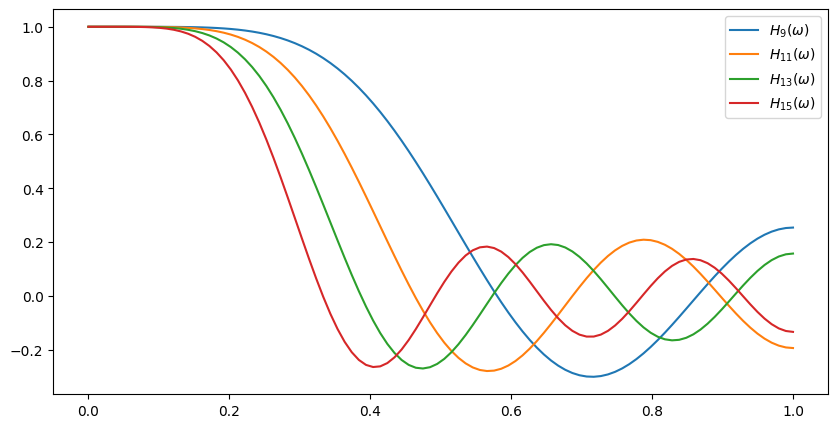

In [48]:
t = np.linspace(0, 1, 100)
f = pi * np.linspace(0, 1, 100)

H_9 = (179 + 270 * cos(f) + 60 * cos(2 * f) - 110 * cos(3 * f) + 30 * cos(4 * f)) / 429
H_11 = (143 + 240 * cos(f) + 120 * cos(2 * f) - 20 * cos(3 * f) - 90 * cos(4 * f) + 36 * cos(5 * f)) / 429
H_13 = (677 + 1200 * cos(f) + 780 * cos(2 * f) + 220 * cos(3 * f) - 270 * cos(4 * f) - 396 * cos(5 * f) + 220 * cos(6 * f)) / 2431
H_15 = (11063 + 20250 * cos(f) + 15000 * cos(2 * f) + 7510 * cos(3 * f) - 330 * cos(4 * f) - 5874 * cos(5 * f) - 5720 * cos(6 * f) \
        + 4290 * cos(7 * f)) / 46189

plt.figure(figsize=(10, 5))

plt.plot(t, H_9, label = "$H_{9}(ω)$")
plt.plot(t, H_11, label = "$H_{11}(ω)$")
plt.plot(t, H_13, label = "$H_{13}(ω)$")
plt.plot(t, H_15, label = "$H_{15}(ω)$")

plt.legend()
plt.show()

## Задание 4

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Формулы Спенсера:

Для 15 точек:

$y_n = \frac{1}{320} (-3s_{n-7} - 6s_{n-6} - 5s_{n-5} + 3s_{n-4} + 21s_{n-3} + 46s_{n-2} + 67s_{n-1} + 74s_{n} + 67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} - 5s_{n+5} - 6s_{n+6} - 3s_{n+7})$

Для 21 точки:

$y_n = \frac{1}{350} (-s_{n-10} - 3s_{n-9} - 5s_{n-8} - 5s_{n-7} - 2s_{n-6} + 6s_{n-5} + 18s_{n-4} + 33s_{n-3} + 47s_{n-2} + 57s_{n-1} + 60s_{n} + 57s_{n+1} + 47s_{n+2} + 33s_{n+3} + 18s_{n+4} + 6s_{n+5} - 2s_{n+6} - 5s_{n+7} - 5s_{n+8} - 3s_{n+9} - s_{n+10})$

Отсюда получим передаточные функции:

Для 15 точек:

$\tilde{H}_{15}(f) = \frac{1}{320}(74 + 134\cos(2\pi f) + 92\cos(4\pi f) + 42\cos(6\pi f) + 6\cos(8\pi f) - 10\cos(10\pi f) - 12\cos(12\pi f) - 6\cos(14\pi f))$

Для 21 точки:

$\tilde{H}_{21}(f) = \frac{1}{350}(60 + 114\cos(2\pi f) + 94\cos(4\pi f) + 66\cos(6\pi f) + 36\cos(8\pi f) + 12\cos(10\pi f) - 4\cos(12\pi f) - 10\cos(14\pi f) - 10\cos(16\pi f) - 6\cos(18\pi f) - 2\cos(20\pi f))$

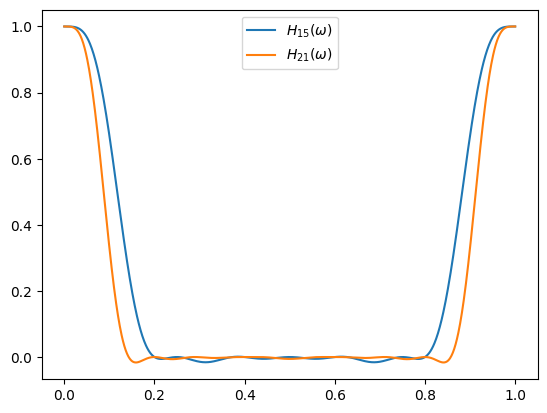

In [54]:
H_15_s = lambda f: 1/320 * (74 + 134*np.cos(2*np.pi*f) + 92*np.cos(4*np.pi*f) + 42*np.cos(6*np.pi*f) + 6*np.cos(8*np.pi*f) - 10*np.cos(10*np.pi*f) - 12*np.cos(12*np.pi*f) - 6*np.cos(14*np.pi*f))
H_21 = lambda f: 1/350 * (60 + 114*np.cos(2*np.pi*f) + 94*np.cos(4*np.pi*f) + 66*np.cos(6*np.pi*f) + 36*np.cos(8*np.pi*f) + 12*np.cos(10*np.pi*f) - 4*np.cos(12*np.pi*f) - 10*np.cos(14*np.pi*f) - 10*np.cos(16*np.pi*f) - 6*np.cos(18*np.pi*f) - 2*np.cos(20*np.pi*f))

f = np.linspace(0, 1, 1000)
plt.plot(f, H_15_s(f), label = "$H_{15}(ω)$")
plt.plot(f, H_21(f), label = "$H_{21}(ω)$")
plt.legend()
plt.show()


## Задание 5

Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.

In [50]:
log = lambda x: 20 * np.log10(abs(x) + 0.01)

Для передаточных функций сглаживающих прямой линией:

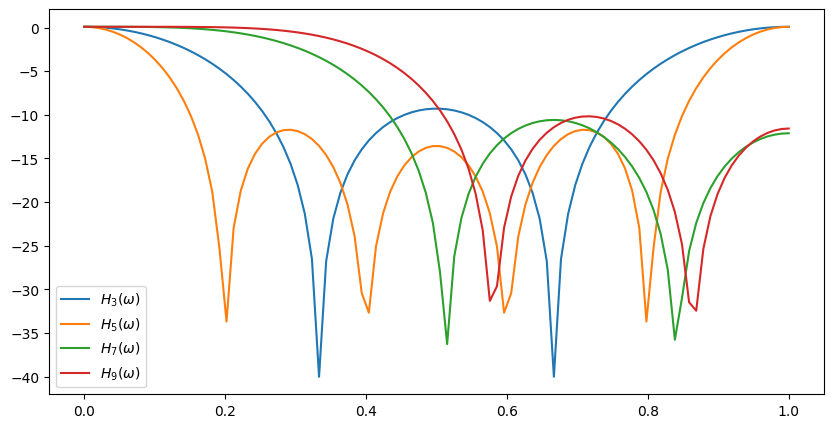

In [51]:


plt.figure(figsize=(10, 5))

plt.plot(t, log(H_3), label = "$H_3(ω)$")
plt.plot(t, log(H_5), label = "$H_5(ω)$")
plt.plot(t, log(H_7), label = "$H_{7}(ω)$")
plt.plot(t, log(H_9), label = "$H_{9}(ω)$")
plt.legend()
plt.show()

Для передаточных функций сглаживающих полинома второй степени:

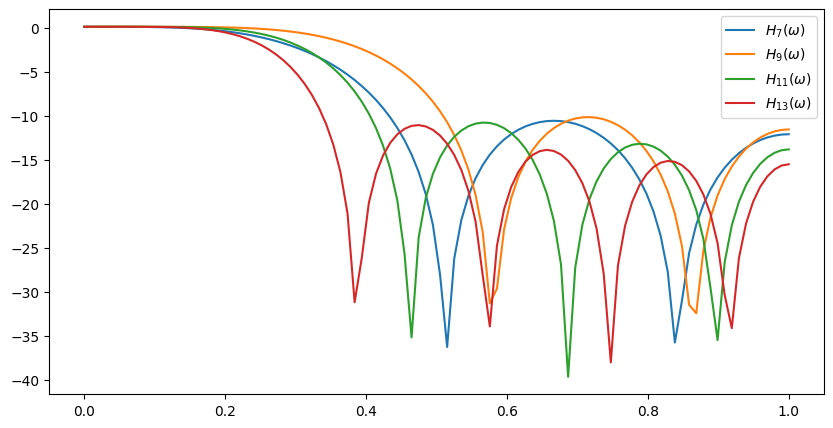

In [52]:
plt.figure(figsize=(10, 5))

plt.plot(t, log(H_7), label = "$H_7(ω)$")
plt.plot(t, log(H_9), label = "$H_9(ω)$")
plt.plot(t, log(H_11), label = "$H_{11}(ω)$")
plt.plot(t, log(H_13), label = "$H_{13}(ω)$")
plt.legend()
plt.show()

Для передаточных функций сглаживающих полиномом четвертой степени:

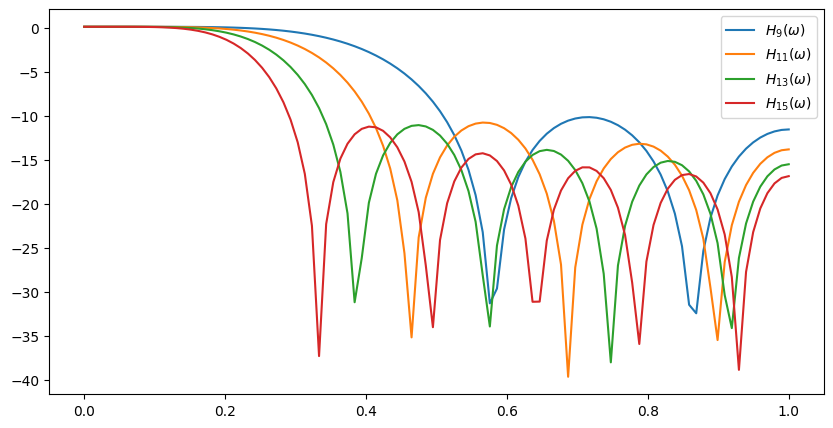

In [55]:
plt.figure(figsize=(10, 5))

plt.plot(t, log(H_9), label = "$H_{9}(ω)$")
plt.plot(t, log(H_11), label = "$H_{11}(ω)$")
plt.plot(t, log(H_13), label = "$H_{13}(ω)$")
plt.plot(t, log(H_15), label = "$H_{15}(ω)$")

plt.legend()
plt.show()

Для передаточных функций сглаживающих формулами Спенсера:

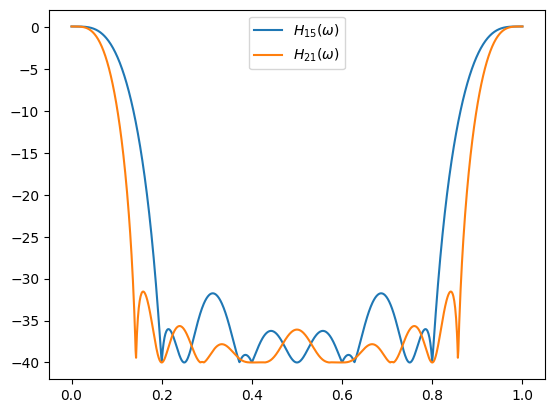

In [56]:
plt.plot(f, log(H_15_s(f)), label = "$H_{15}(ω)$")
plt.plot(f, log(H_21(f)), label = "$H_{21}(ω)$")
plt.legend()
plt.show()

Перевод в логарифмическую шкалу позволяет лучше видеть изменение функции, там где амплитуда сигнала близка к нулю, что позволяет анализировать свойства фильтров, там где сигнал сильно подавлен

## Задание 6

Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4.

У всех передаточных функций наблюдается резкое падение и подавление высоких частот.

Для всех функций при увиличении числа точек наблюдается более резкое падение.

Для передаточных функций соответствующих сглаживанию полинономами при повышении степени расширяет область частот близких к единице.

У функции соответсвующей сглаживанию по формулам Спенсера после падения колебания имеют очень малую амплитуду.

## Выводы



Был проведен анализ частотных характеристик известных формул полиномиального сглаживания временных рядов для сглаживаний полиномами 1-й, 2-й, 4-й степенями и формулами Спенсера. Для их передаточных функций были построенны графики в линейной и логарифмической шкалах для различного числа точек.